# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [1]:
import pandas as pd


# Notebook Presentation

In [2]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [3]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [4]:
df_apps.shape

(10841, 12)

In [6]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_MBs        10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Android_Ver     10839 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1016.5+ KB


In [10]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
3544,Hey That's Pretty Good!,TOOLS,4.60,222,10.00,"10,000",Free,0,Everyone,Tools,"July 29, 2016",2.3 and up
5375,The TK-App - everything under control,HEALTH_AND_FITNESS,4.50,8642,18.00,"100,000",Free,0,Everyone,Health & Fitness,"August 2, 2018",4.4 and up
9511,Starbucks,FOOD_AND_DRINK,4.50,455496,35.00,"10,000,000",Free,0,Everyone,Food & Drink,"August 1, 2018",4.4 and up
6635,My Little Pony: Story Creator,FAMILY,4.20,11002,21.00,"1,000,000",Free,0,Everyone,Education;Action & Adventure,"May 11, 2017",4.0.3 and up
657,DX Glow - Clock Widget,PERSONALIZATION,4.40,5,3.40,50,Paid,$0.99,Everyone,Personalization,"March 20, 2015",3.0 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [12]:
df_apps.drop(columns=['Android_Ver', 'Last_Updated'])

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business
...,...,...,...,...,...,...,...,...,...,...
10836,Subway Surfers,GAME,4.50,27723193,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10837,Subway Surfers,GAME,4.50,27724094,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10838,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10839,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [17]:
df_apps_clean = df_apps.dropna()

In [18]:
df_apps_clean.shape

(9365, 12)

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [21]:
df_apps_clean = df_apps_clean.drop_duplicates(subset=['App', 'Type', 'Price'])

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social,"July 31, 2018",Varies with device


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from PIL import Image
import scipy

In [38]:
my_array = np.array([[0.1, 8.2, 7.9, 3.4],
                    [5.9, 6, 7, 8]])

In [42]:
my_array[0][1]

8.2

(5, 5, 3)


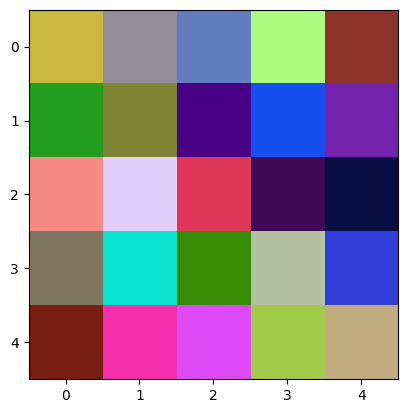

In [80]:
z = np.random.random((5,5,3)) # without an import statement
print(z.shape)
plt.imshow(z)


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

C:\Users\Kingsley\AppData\Local\Temp\ipykernel_10448\3967513444.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = misc.face()


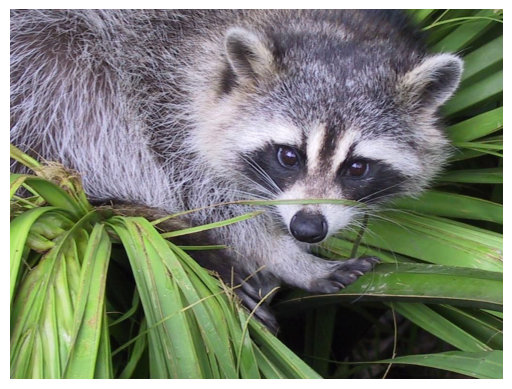

In [90]:
img = misc.face()
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


### The most expensive apps sub $250

### Highest Grossing Paid Apps (ballpark estimate)

# Plotly Bar Charts & Scatter Plots: Analysing App Categories

### Vertical Bar Chart - Highest Competition (Number of Apps)

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [12]:
import random

my_array = []
for i in range(10000000):
    my_array.append(random.randint(1, 20))


In [23]:
my_array.pop()

45

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [36]:
stock_prices = {}
with open('hash table.csv', 'r') as f:
    for line in f:
        tokens = line.split(',')
        day = tokens[0]
        price = float(tokens[1])
        stock_prices[day] = price

In [38]:
stock_prices

{'6-Mar': 310.0,
 '7-Mar': 340.0,
 '8-Mar': 380.0,
 '9-Mar': 302.0,
 '10-Mar': 297.0,
 '11-Mar': 323.0}

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [40]:
class MyClass:
    def __init__(self, value):
        self.value = value

    def __hash__(self):
        # Custom hash function
        return hash(self.value)

# Create an instance of MyClass
obj = MyClass(100)
print(hash(obj))

100


**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.